# 北京公交站线路图数据挖掘示例

只包含部分线路站点及站点之间的连接关系
不包含站点之间的距离和时间

In [1]:
# 导入包
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

In [38]:
# 导入数据

df=pd.read_excel('beijing1.xlsx')

['百万庄西口', '百万庄中街', '百万庄东口', '展览路', '阜成门外', '阜成门', '阜成门内', '白塔寺东', '西四路口东', '西安门', '北海', '神武门', '沙滩路口西', '美术馆东', '东四路口东', '朝内小街', '朝阳门内', '朝阳门外', '神路街', '东大桥路口东', '关东店', '呼家楼西', '小庄路口东', '红庙路口西', '红庙路口东', '北京南站', '永定门汽车站', '陶然桥北', '太平街', '虎坊路', '虎坊桥路口西', '果子巷', '菜市口北', '校场口', '宣武门外', '西单路口南', '西单商场', '缸瓦市', '西四路口南', '阜外西口', '甘家口北', '甘家口大厦', '百万庄', '二里沟', '动物园枢纽站', '北京站西', '北京站西街', '台基厂路口东', '王府井路口北', '校尉胡同', '新东安市场', '东安门大街', '骑河楼', '崇文门内', '东单路口北', '米市大街', '灯市东口', '灯市西口', '美术馆北', '大佛寺', '宽街路口南', '北兵马司', '交道口南', '方家胡同', '安定门内', '地坛西门', '蒋宅口东', '兴化路南口', '和平里北街', '和平里路口西', '地铁柳芳站', '天桥', '友谊医院东', '永安路', '大红罗厂西口', '平安里路口南', '护国寺', '新街口南', '新开胡同', '西直门内', '西直门外', '动物园', '白石桥东', '东直门枢纽站', '东直门内', '东内小街', '北新桥路口南', '东四十二条', '魏家胡同', '钱粮胡同', '东四路口南', '磁器口北', '红桥路口北', '红桥路口西', '天坛北门', '金鱼池', '天桥路口东', '北纬路东站', '北纬路', '太平街北口', '南站幸福路', '北新桥路口西', '交道口东', '小经厂', '宝钞胡同', '鼓楼', '地安门外', '北海北门', '东官房', '厂桥路口东', '平安里路口东', '平安医院', '官园', '车公庄西', '三塔寺', '二里沟东口', '北京展览馆']
120
True


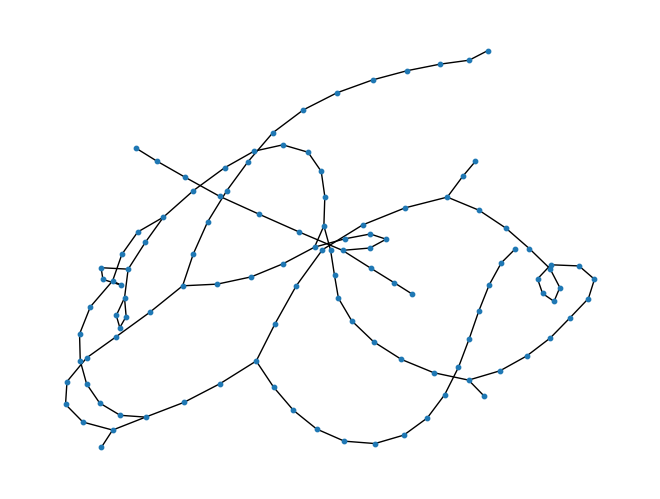

In [76]:
g=nx.Graph()

# 获取站点名称
nodes=df['站点名称']
stations=[]
for n in nodes:
    if n not in stations:
        stations.append(n)

g.add_nodes_from(stations)
print(g.nodes)

for i in range(len(df.index)-2):

    if df.iloc[i,0] == df.iloc[i+1,0]:
            g.add_edge(df.iloc[i,3],df.iloc[i+1,3])

pos=nx.spring_layout(g,seed=125)
nx.draw(g,node_size=10)

print(g.size())
print(g.has_edge('阜成门','阜成门内'))

### Node Degree

In [77]:
x=dict(g.degree())
nx.degree_centrality(g)
#nx.eigenvector_centrality(g)#不收敛
# 必经之地
nx.betweenness_centrality(g)
# 去哪都近
nx.closeness_centrality(g)

{'百万庄西口': 0.05218173639226271,
 '百万庄中街': 0.05502846299810247,
 '百万庄东口': 0.058145363408521306,
 '展览路': 0.06157112526539278,
 '阜成门外': 0.06491326245103525,
 '阜成门': 0.06855791962174941,
 '阜成门内': 0.07254534083802376,
 '白塔寺东': 0.07692307692307693,
 '西四路口东': 0.0817477096546864,
 '西安门': 0.08146067415730338,
 '北海': 0.08128941836019622,
 '神武门': 0.08123249299719888,
 '沙滩路口西': 0.08134642356241234,
 '美术馆东': 0.07636603028308098,
 '东四路口东': 0.07187112763320942,
 '朝内小街': 0.06779661016949153,
 '朝阳门内': 0.06408839779005525,
 '朝阳门外': 0.06070120355834641,
 '神路街': 0.05759682224428997,
 '东大桥路口东': 0.05474280320906088,
 '关东店': 0.05211141060197664,
 '呼家楼西': 0.04967880085653105,
 '小庄路口东': 0.047424366312346686,
 '红庙路口西': 0.04533020711215319,
 '红庙路口东': 0.04338070306656694,
 '北京南站': 0.05397859469520707,
 '永定门汽车站': 0.05697445972495088,
 '陶然桥北': 0.06032241289651586,
 '太平街': 0.0639470782800441,
 '虎坊路': 0.06594656054576464,
 '虎坊桥路口西': 0.0699216395418927,
 '果子巷': 0.07009063444108761,
 '菜市口北': 0.0703456640388114,
 '校场口': 

[(0, 1), (0, 2), (1, 2)]
[(0, 1), (0, 3), (1, 3)]
[(0, 1), (0, 7), (1, 7)]
[(0, 1), (0, 13), (1, 13)]
[(0, 1), (0, 17), (1, 17)]
[(0, 1), (0, 19), (1, 19)]
[(0, 1), (0, 21), (1, 21)]
[(0, 2), (0, 3), (2, 3)]
[(0, 2), (0, 7), (2, 7)]
[(0, 2), (0, 8), (8, 2)]
[(0, 2), (0, 13), (2, 13)]
[(0, 3), (0, 7), (3, 7)]
[(0, 3), (0, 12), (3, 12)]
[(0, 3), (0, 13), (3, 13)]
[(0, 4), (0, 6), (4, 6)]
[(0, 4), (0, 10), (10, 4)]
[(0, 5), (0, 6), (5, 6)]
[(0, 5), (0, 10), (10, 5)]
[(1, 2), (1, 3), (2, 3)]
[(1, 2), (1, 7), (2, 7)]
[(1, 2), (1, 13), (2, 13)]
[(1, 3), (1, 7), (3, 7)]
[(1, 3), (1, 13), (3, 13)]
[(2, 3), (2, 7), (3, 7)]
[(2, 3), (2, 13), (3, 13)]
[(8, 2), (8, 32), (2, 32)]
[(16, 5), (16, 6), (5, 6)]
[(8, 30), (8, 32), (32, 30)]
[(8, 30), (8, 33), (33, 30)]
[(8, 32), (8, 33), (33, 32)]
[(32, 14), (32, 33), (33, 14)]
[(32, 15), (32, 33), (33, 15)]
[(32, 18), (32, 33), (33, 18)]
[(32, 20), (32, 33), (33, 20)]
[(32, 22), (32, 33), (33, 22)]
[(33, 23), (33, 27), (27, 23)]
[(32, 23), (32, 29), (29

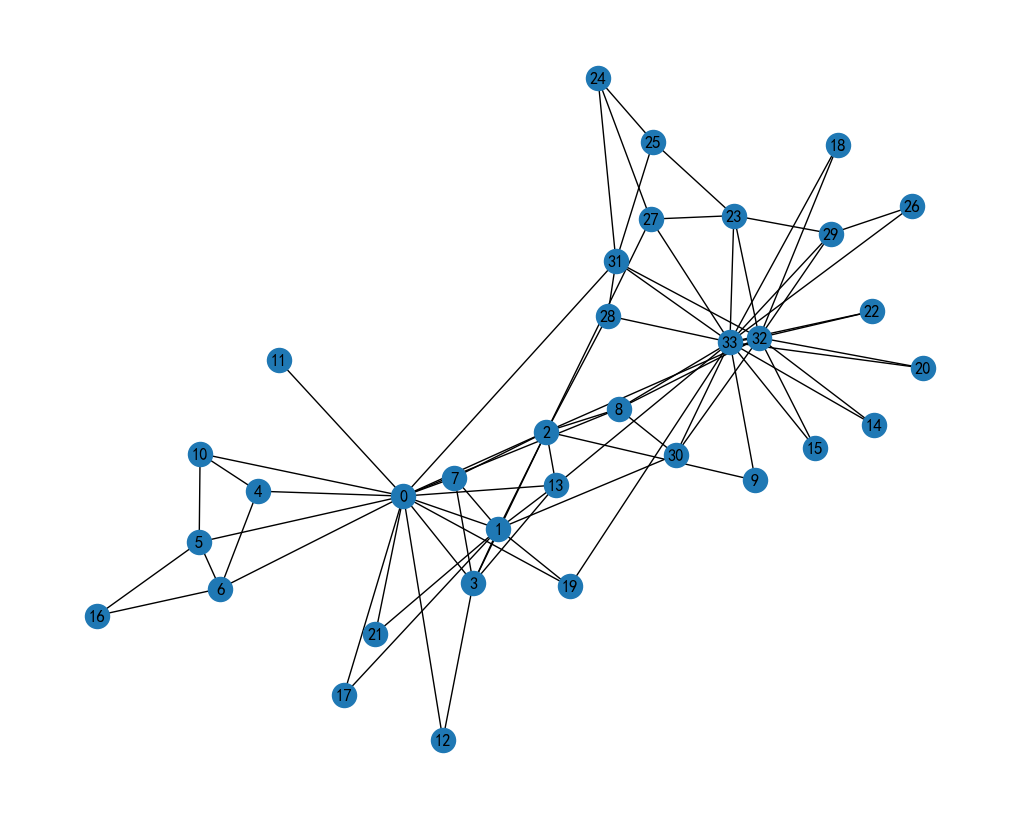

In [81]:
# 计算全图Graphlet个数
import itertools

# 导入图
graph=nx.karate_club_graph()
plt.figure(figsize=(10,8))
pos=nx.spring_layout(graph,seed=123)
nx.draw(graph,pos,with_labels=True)

# 指定Graphlet
target=nx.complete_graph(3)

# 匹配Graphlet,统计个数
num=0
# 遍历全图中，符合graphlet中节点个数的所有节点重合
for sub_nodes in itertools.combinations(graph.nodes(),len(target.nodes())):
    # 从全图中拾取出子图
    subg = graph.subgraph(sub_nodes)
    # 如果子图是完整连通域，并且符合graphlet特征，输出原图节点编号
    if nx.is_connected(subg) and nx.is_isomorphic(subg,target):
        num+=1
        print(subg.edges())

# 拉普拉斯矩阵
L=D-A
L为拉普拉斯矩阵
D为节点degree对角矩阵
A为邻接矩阵

In [ ]:
A=nx.adjacency_matrix(graph)
L=nx.laplacian_matrix(graph)

# 归一化拉普拉斯矩阵
L1=nx.normalized_laplacian_matrix(graph)

# 对矩阵进行特征值分解
e=np.linalg.eigvals(L1,A)

# 最大最小特征值
max(e)
min(e)
